In [1]:
import sys
# This is needed to display the images.
%matplotlib inline

sys.path.append("..")

In [2]:
import tensorflow as tf
import datetime
import os
import numpy as np

from inception.data import build_image_data
from inception import image_processing
from inception import inception_model as inception
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [3]:
checkpoint_dir = "/data/dev/inception-v3"
batch_size = 100

In [4]:

def inference_on_image(img_path):
  with tf.Graph().as_default():
    num_classes = 1001

    coder = build_image_data.ImageCoder()

    image_buffer, _, _ =  build_image_data._process_image(img_path, coder)

    image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
    image = tf.expand_dims(image,0) # (299, 299,3) -> (1, 299, 299, 3)

    logits, _ = inception.inference(image, num_classes, for_training=False, restore_logits=True)

      
    saver = tf.train.Saver()
    with tf.Session() as tf_session:
      ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
      if ckpt and ckpt.model_checkpoint_path:
        if os.path.isabs(ckpt.model_checkpoint_path):
          # Restores from checkpoint with absolute path.
          saver.restore(tf_session, ckpt.model_checkpoint_path)
          # saver.restore(tf_session, "/tmp/train_back/model.ckpt-640")
        else:
          # Restores from checkpoint with relative path.
          saver.restore(tf_session, os.path.join(FLAGS.checkpoint_dir,
                                           ckpt.model_checkpoint_path))
      l = tf_session.run([logits])
      return l
    

In [5]:
my_image_path = "/data/dev/pets/images/"
img_file_list = [f for f in listdir(my_image_path)  if (f.rfind('jpg') > -1)]
file_size = len(img_file_list)

In [6]:

def inference_on_multi_image():
  print("total image size {} ".format(file_size) )
  
  total_batch_size = file_size / batch_size + 1
  logit_list = []

  for n in xrange(total_batch_size):
      print("step :{} / {}".format(n + 1, total_batch_size))
      mini_batch = img_file_list[n * batch_size: (n + 1) * batch_size]
      mini_adarr = np.ndarray(shape=(0, 299,299,3))
        
      with tf.Graph().as_default():
        num_classes = 1001

        coder = build_image_data.ImageCoder()
        for i, image in enumerate(mini_batch):
          image_buffer, _, _ =  build_image_data._process_image(my_image_path + image, coder)
          image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
          image = tf.expand_dims(image, 0) # (299, 299,3) -> (1, 299, 299, 3)
          mini_adarr = tf.concat([mini_adarr, image], 0) 

        logits, _ = inception.inference(mini_adarr, num_classes, for_training=False, restore_logits=True)

        saver = tf.train.Saver()
        with tf.Session() as tf_session:

          ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
          if ckpt and ckpt.model_checkpoint_path:
            if os.path.isabs(ckpt.model_checkpoint_path):
              # Restores from checkpoint with absolute path.
              saver.restore(tf_session, ckpt.model_checkpoint_path)
              # saver.restore(tf_session, "/tmp/train_back/model.ckpt-640")
            else:
              # Restores from checkpoint with relative path.
              saver.restore(tf_session, os.path.join(FLAGS.checkpoint_dir,
                                               ckpt.model_checkpoint_path))

          l = tf_session.run([logits])
          for ll in l[0]:
            logit_list.append(ll)
                
  return logit_list

In [7]:
def show_image(predictions):
    for i in predictions:
        print my_image_path + img_file_list[i]
        print_image(my_image_path + img_file_list[i])

def print_image(path):
    plt.figure()
    im = mpimg.imread(path)
    plt.imshow(im)

In [8]:
logit_list = inference_on_multi_image()

total image size 7390 
step :0 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[-0.49989206, -0.52143586,  0.71239054, ..., -1.1118288 ,
        -0.13012344,  2.15771079],
       [-0.0722822 , -1.00555408,  0.07125863, ..., -0.30249733,
        -0.18974198,  0.47983891],
       [ 0.13983613,  0.76268864,  0.81003654, ...,  1.10154605,
         0.17049578,  4.12222576],
       ..., 
       [-0.19061261,  0.07423744, -0.06802353, ..., -0.94218618,
         0.6540345 ,  1.10756421],
       [-0.20076412, -0.29749194, -1.18120921, ..., -1.09881878,
        -0.33287966,  0.14092708],
       [ 0.06092596, -0.56801838, -0.21296495, ..., -1.07536745,
         0.3665823 , -0.31535017]], dtype=float32)]
step :1 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[-0.45428357, -0.36668342, -0.20961575, ..., -0.83865464,
         0.51241028,  1.60330725],
       [-0.39852852, -0.45226374,  0.06715438, ..., -

INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[-0.3342433 ,  0.08433894, -0.06747448, ..., -0.64961302,
         0.56449723,  0.47424549],
       [-0.5794909 , -1.28288579, -0.51621854, ..., -1.36357224,
        -0.18733382,  1.05920863],
       [-0.74456245, -0.45918629, -0.6741097 , ..., -1.01346493,
         0.01244324,  0.49130791],
       ..., 
       [-0.50145155, -1.32890558, -0.80096173, ..., -0.07593745,
         0.78206706,  1.61608386],
       [ 0.05254155, -1.51121652, -0.18948382, ..., -1.24775743,
        -0.76674885,  2.68636703],
       [-0.11617118, -0.92964351,  0.16858897, ..., -0.88073713,
        -0.31558689,  0.25865263]], dtype=float32)]
step :12 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.26376319,  0.37030032, -0.44873101, ...,  0.03912047,
         1.87651098,  3.06093931],
       [ 0.01969504, -0.30173552, -0.20558678, ..., -0.90601188,
         4.10479879,  1

INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.06213236, -0.83965886, -0.70593071, ..., -0.42449126,
        -0.36365485,  1.00360811],
       [-0.18631595, -0.41363496, -0.26681972, ..., -0.73455524,
        -0.67799556,  0.54052615],
       [ 0.15024948, -1.09720445, -0.92728591, ..., -0.25830939,
        -0.71084476, -0.47261465],
       ..., 
       [ 0.20889771, -0.78116953, -0.4799583 , ..., -0.63297665,
        -0.4692573 , -0.73561972],
       [ 0.0464412 , -0.45487556,  0.17658469, ..., -0.40027565,
        -0.88989472, -0.51796585],
       [-0.19019365, -0.84560716, -0.59879601, ..., -0.95366257,
        -0.8461566 ,  0.79311419]], dtype=float32)]
step :24 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[-0.08893651,  0.76261365,  1.05875111, ..., -0.34195176,
         0.22935531, -1.15506625],
       [-0.35801685,  0.05888179, -0.37772676, ..., -0.40895614,
         0.41038522,  0

INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.00214058, -0.46794969,  0.3734813 , ..., -0.80936867,
         0.47820231,  0.36272982],
       [ 0.04687077, -0.31792217,  0.41571644, ..., -0.43353459,
         0.56020927,  0.26034546],
       [-0.11849654, -0.65246797,  0.36989751, ..., -0.76632833,
         1.08084464,  0.21503481],
       ..., 
       [-0.21652049, -0.60390007, -0.41790938, ...,  0.25890154,
        -0.23282233, -0.2152172 ],
       [ 0.03386092, -0.51767719,  0.20374671, ..., -0.12283681,
        -0.17636254,  0.07619131],
       [-0.189224  , -0.69956958, -0.42546651, ...,  0.18256056,
        -0.05027938,  0.21529934]], dtype=float32)]
step :36 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ -1.90530419e-01,  -7.30106473e-01,  -5.76264143e-01, ...,
          6.03235841e-01,  -6.85539007e-01,  -1.22700274e-01],
       [  3.54556441e-02,  -6.40283585e-01,  -5.70133090e-

INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[-0.02695483,  0.76224917,  0.12854037, ..., -0.11189574,
         0.18426916, -0.48992765],
       [ 0.21684879,  0.55432218, -0.01070929, ...,  0.06376874,
         0.37166348, -0.36061651],
       [ 0.16194654,  0.53033054, -0.17722155, ..., -0.0603061 ,
         0.23004356, -0.4489755 ],
       ..., 
       [ 0.25507742,  0.85317379, -0.01802465, ..., -0.16953091,
         0.26771715, -0.60254347],
       [ 0.28689939,  0.15592626, -0.51357311, ..., -0.28327087,
         0.43763414, -0.52092272],
       [ 0.26130801,  0.48393062,  0.2076039 , ...,  0.16436344,
         0.64404356,  0.35163361]], dtype=float32)]
step :47 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.14149171,  0.51150805, -0.03202638, ...,  0.03974718,
         0.65016735, -0.82580942],
       [ 0.21930844,  0.28260979,  0.30162051, ...,  0.0115338 ,
         0.44081751,  0

[array([[ 0.27756959, -0.18971504, -0.3102245 , ..., -0.02086401,
         0.20263174,  0.49681431],
       [ 0.0344004 , -1.03526473, -1.00777066, ...,  0.45091897,
         0.39277098, -0.16986948],
       [ 0.14359921,  0.08123833, -0.27568531, ...,  0.04990363,
         0.30605003, -0.49753505],
       ..., 
       [ 0.23286909, -0.27017197, -0.22712277, ...,  0.05203021,
         0.48085263, -0.52538621],
       [ 0.32897168, -0.49743491, -0.18953234, ...,  0.52858043,
         0.16861263, -0.02051139],
       [ 0.25578624,  0.41195652, -0.05971053, ..., -0.03210446,
         0.30396417, -0.50098687]], dtype=float32)]
step :58 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.02716339,  0.11597474,  0.44053152, ...,  0.1043725 ,
        -0.2091756 ,  0.34751967],
       [-0.08117777,  0.18119866,  0.33964536, ...,  0.03107971,
        -0.30205321,  0.56754011],
       [-0.1531598 , -0.02475339,  0.11884442, ..., -0.20068274,
      

INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.23165888,  0.33908001,  0.31904075, ...,  0.04666111,
         0.0925386 , -0.26473296],
       [ 0.21394062,  0.33035436,  0.59649491, ...,  0.06575269,
        -0.01769313, -0.33859664],
       [ 0.17095774,  0.72654545,  0.13057715, ...,  0.20587802,
        -0.02888831,  0.03396925],
       ..., 
       [-0.18572974, -0.00445974, -0.14096898, ..., -0.06529906,
         0.63155913,  0.66471541],
       [ 0.237436  , -0.34135273, -0.40626764, ...,  0.48052818,
        -0.215238  ,  0.0281181 ],
       [ 0.30749434, -0.17813519, -0.69887555, ...,  0.49105811,
        -0.68522441, -0.65303046]], dtype=float32)]
step :70 / 74
INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585
[array([[ 0.24509007, -0.18118429, -0.57824409, ...,  0.72983748,
        -0.79136705,  0.36556897],
       [-0.20072198,  0.22030434, -1.43757117, ...,  0.40719646,
        -0.8481555 ,  0

In [9]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=11)
knn.fit(logit_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=11, p=2, radius=1.0)

In [44]:
predict = knn.kneighbors(logit_list[999], return_distance=False)
print predict

[[999 824 939 908 951 971 893 954 874 990 982]]


/Users/IM053/tensorflow_cpu_2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


/data/dev/pets/images/beagle_99.jpg
/data/dev/pets/images/beagle_122.jpg
/data/dev/pets/images/beagle_44.jpg
/data/dev/pets/images/beagle_20.jpg
/data/dev/pets/images/beagle_55.jpg
/data/dev/pets/images/beagle_73.jpg
/data/dev/pets/images/beagle_187.jpg
/data/dev/pets/images/beagle_58.jpg
/data/dev/pets/images/beagle_17.jpg
/data/dev/pets/images/beagle_90.jpg
/data/dev/pets/images/beagle_83.jpg


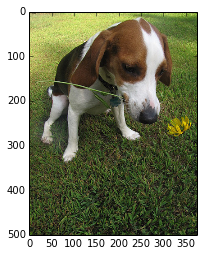

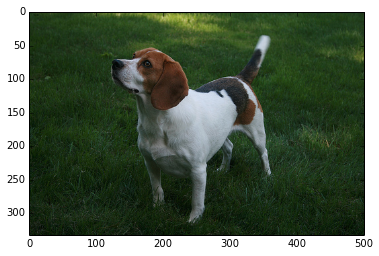

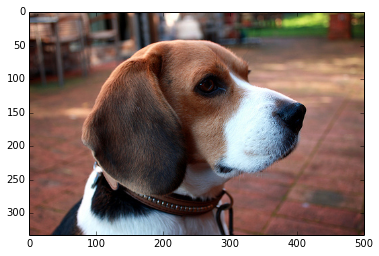

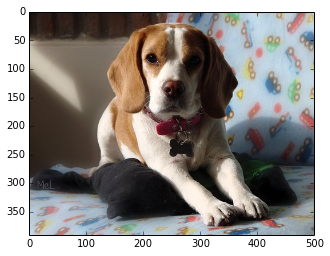

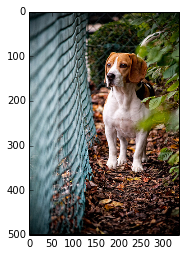

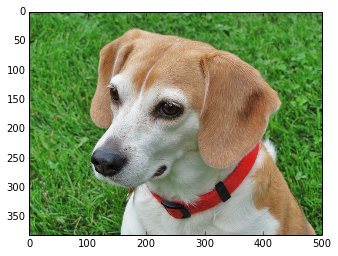

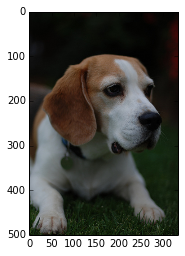

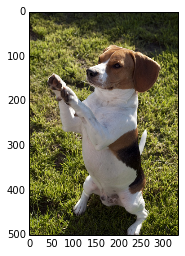

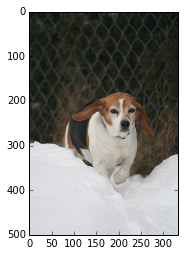

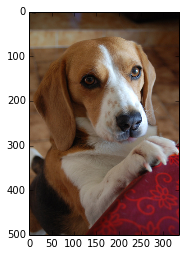

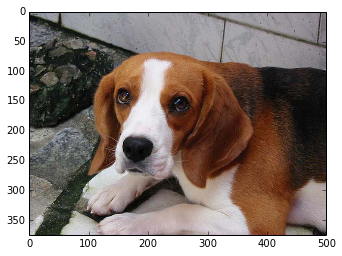

In [45]:
for i in predict[0]:
    print my_image_path + img_file_list[i]
    print_image(my_image_path + img_file_list[i])

INFO:tensorflow:Restoring parameters from /data/dev/inception-v3/model.ckpt-157585


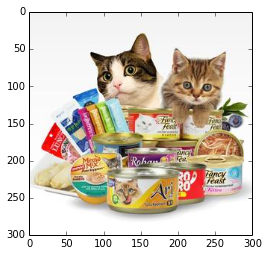

In [25]:
image_path_one = "/Users/IM053/Downloads/thumb4_2643514.jpg"

logit_one = inference_on_image(image_path_one)

print_image(image_path_one)

/data/dev/pets/images/Maine_Coon_18.jpg
/data/dev/pets/images/Maine_Coon_115.jpg
/data/dev/pets/images/Bengal_109.jpg
/data/dev/pets/images/Maine_Coon_116.jpg
/data/dev/pets/images/Maine_Coon_100.jpg
/data/dev/pets/images/Egyptian_Mau_213.jpg
/data/dev/pets/images/Maine_Coon_89.jpg
/data/dev/pets/images/Maine_Coon_132.jpg
/data/dev/pets/images/Maine_Coon_266.jpg
/data/dev/pets/images/British_Shorthair_180.jpg
/data/dev/pets/images/Maine_Coon_29.jpg


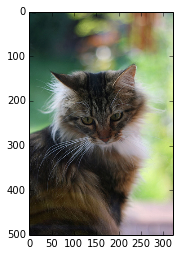

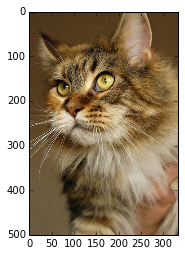

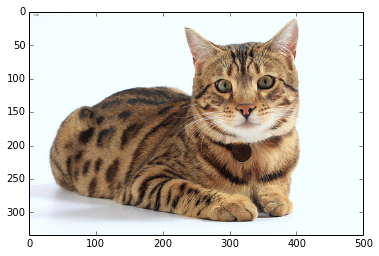

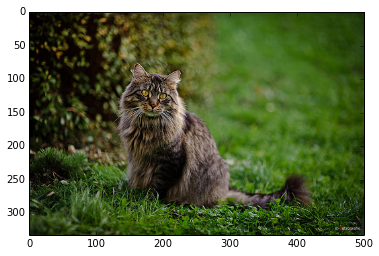

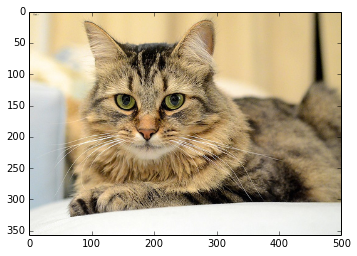

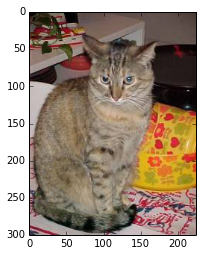

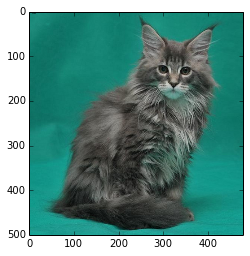

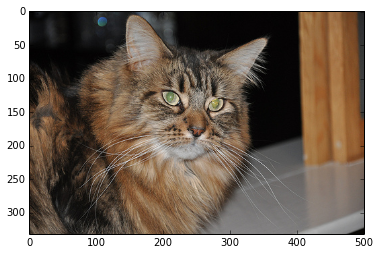

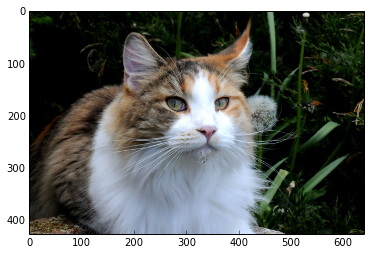

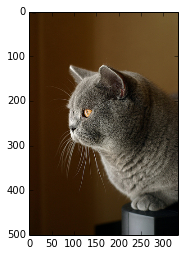

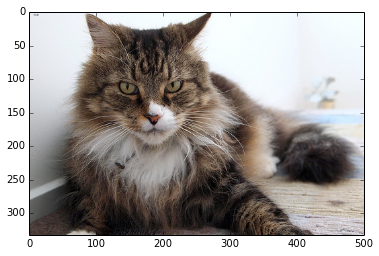

In [26]:
predict_once = knn.kneighbors(logit_one[0], return_distance=False)

show_image(predict_once[0])
